In [1]:
%config IPCompleter.greedy=True

In [2]:
import os
import pandas as pd
from pathlib import Path
#from dotenv import find_dotenv, load_dotenv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import scipy.stats as sp
import seaborn as sns

### Set Directories

In [3]:
cd ~/Ames/Ames

C:\Users\scottwi\Ames\Ames


In [4]:

root_directory = os.getcwd()

train_data_path = os.path.join(root_directory, os.path.join('data', 'raw', 'train1.csv'))

### Import the data

In [5]:
train_dataframe = pd.read_csv(train_data_path)

### Get Info

In [6]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1222 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
pd.set_option('display.max_columns', None)
train_dataframe.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### Rename variables that start with number

In [8]:
train_dataframe = train_dataframe.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF", "3SsnPorch": "ThreeSsnPorch"})

### discrete and continuous variable

In [9]:
cols = [       
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',       
'BsmtFinSF2',       
'BsmtUnfSF',        
'TotalBsmtSF',      
'FirstFlrSF',
'SecondFlrSF',         
'LowQualFinSF',     
'GrLivArea',        
'BsmtFullBath',     
'BsmtHalfBath',     
'FullBath',         
'HalfBath',         
'BedroomAbvGr',     
'KitchenAbvGr',     
'TotRmsAbvGrd',     
'Fireplaces',       
'GarageYrBlt',      
'GarageCars',       
'GarageArea',       
'WoodDeckSF',       
'OpenPorchSF',      
'EnclosedPorch',    
'ThreeSsnPorch',        
'ScreenPorch',      
'PoolArea',         
'MiscVal',                     
'YrSold']



In [10]:
cat_cols = [
'MSZoning',
'Street',
'Alley',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC'
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition'
]

### Make scatter plots of continuous variables

In [11]:
#train_dataframe.plot(kind='scatter', x='LotFrontage', y='SalePrice', color='red')


### Correlations
Pearson correlation for linear relationships.

Spearman for non-parametric correlations for non-linear relationships. Good when distribution is not normal or relationship
non-linear.

In [12]:
def pearson_list(cols, input_dataframe):
    answer = []
    for col in cols:
        yval = input_dataframe['SalePrice'].values
        xval = input_dataframe[col].values
        nas = np.logical_or(np.isnan(xval), np.isnan(yval))
        pearson = pearsonr(xval[~nas], yval[~nas])
        answer.append([col, round(pearson[0], 2), round(pearson[1], 2)])
    answer = sorted(answer, key=lambda x: abs(x[1]), reverse=True)
    return answer

def spearman_list(cols, input_dataframe):
    answer = []
    for col in cols:
        yval = input_dataframe['SalePrice'].values
        xval = input_dataframe[col].values
        nas = np.logical_or(np.isnan(xval), np.isnan(yval))
        spearman = sp.spearmanr(xval[~nas], yval[~nas])
        answer.append([col, round(spearman[0], 2), round(spearman[1], 2)])
    answer = sorted(answer, key=lambda x: abs(x[1]), reverse=True)
    return answer


### Correlation Plotting 

In [26]:
def my_continuous_corr_plot(col_name, input_dataframe):
    plt.suptitle("{}".format(col_name))
    yval = input_dataframe['SalePrice'].values
    xval = input_dataframe[col_name].values
    nas = np.logical_or(np.isnan(xval), np.isnan(yval))
    spearman = sp.spearmanr(xval[~nas], yval[~nas])
    #text caused an error
    #plt.text(0,0, "spearman\'s r: " + str(round(spearman[0], 4)) + ", " + str(round(spearman[1], 4)))
    plt.scatter(xval[~nas], yval[~nas], c='red', alpha='0.2', )
    plt.show()
    
def my_cat_corr_plot(col_name, input_dataframe):
    plt.suptitle("{}".format(col_name))
    sns.catplot(x=col_name, y='SalePrice', data=train_dataframe, alpha = 0.5)
    plt.show()

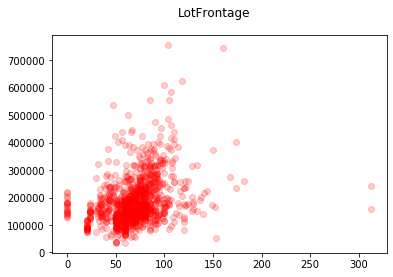

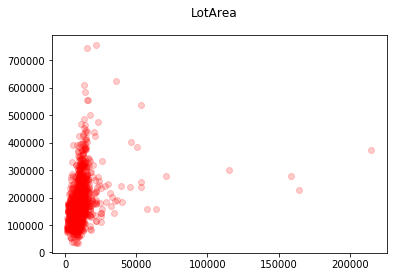

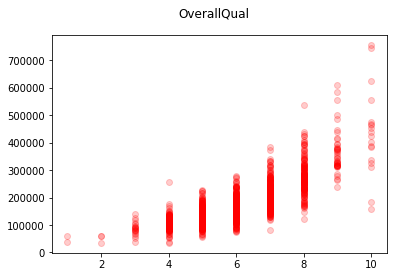

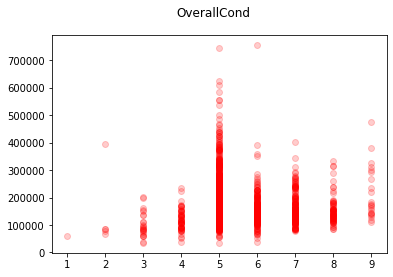

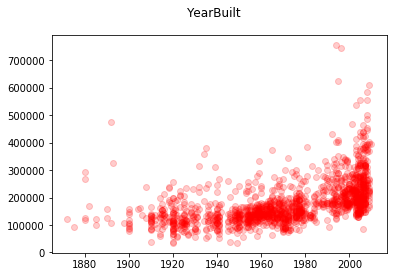

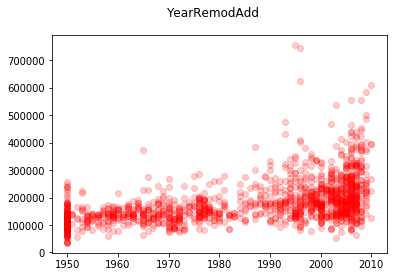

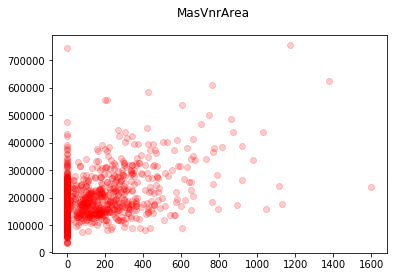

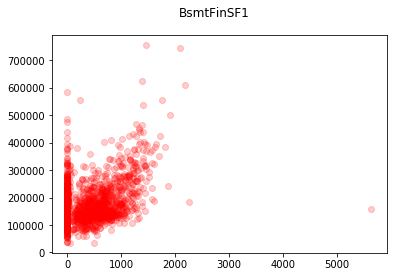

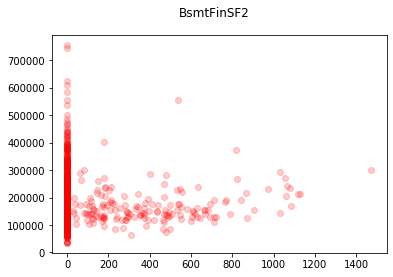

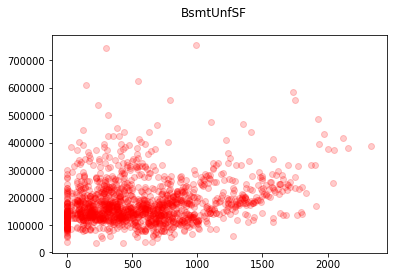

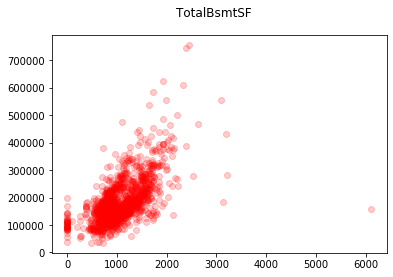

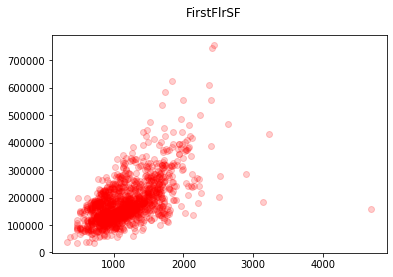

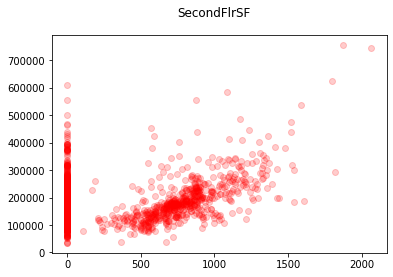

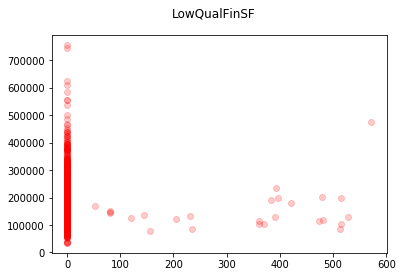

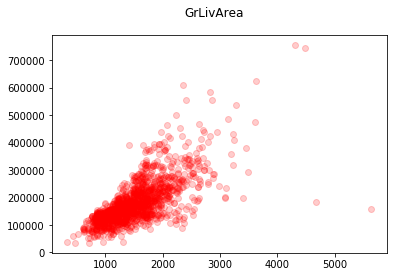

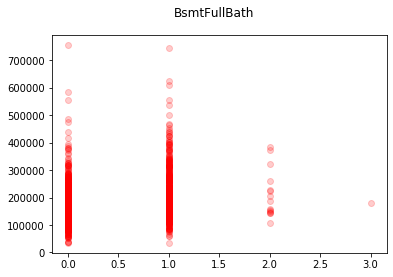

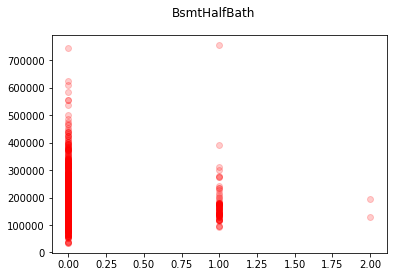

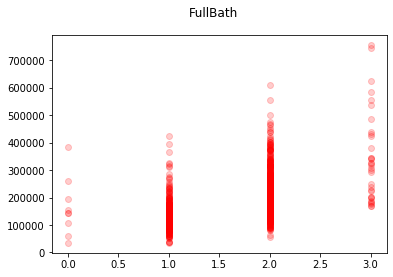

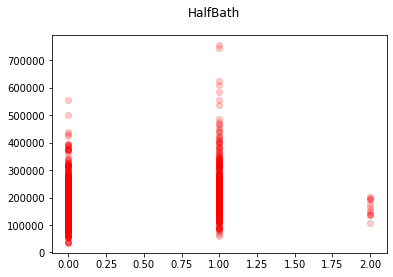

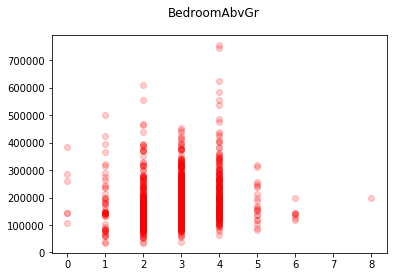

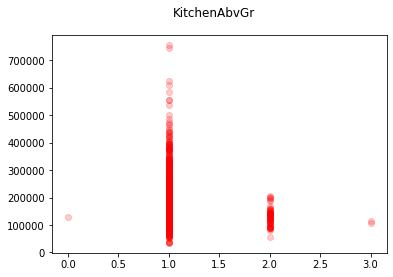

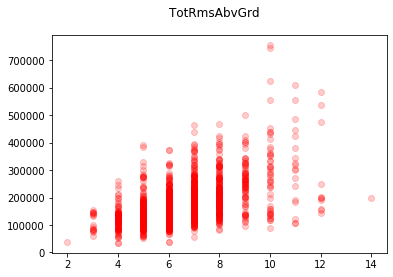

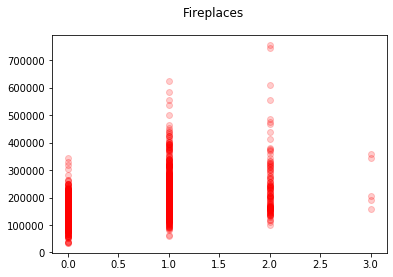

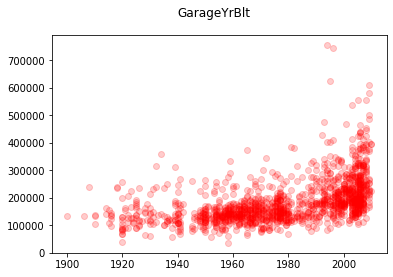

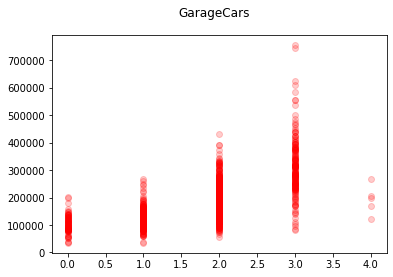

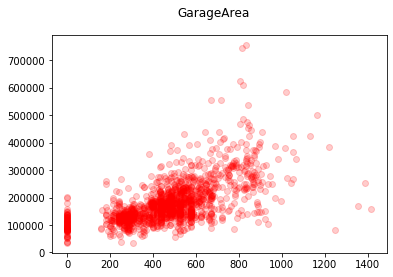

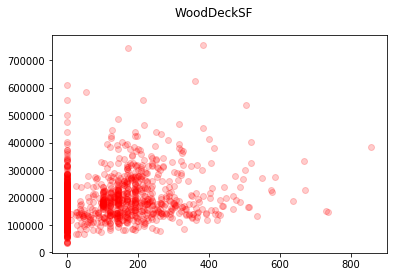

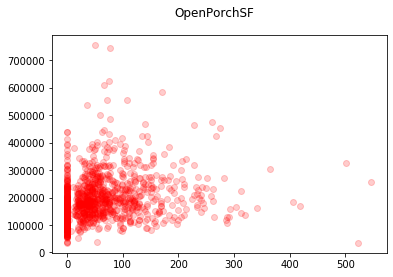

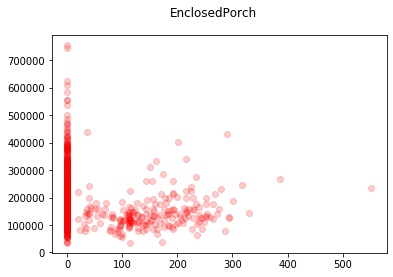

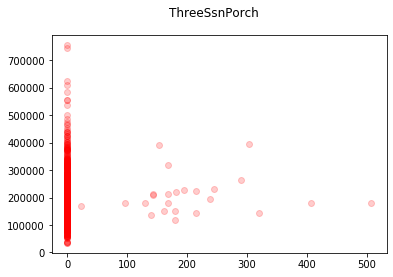

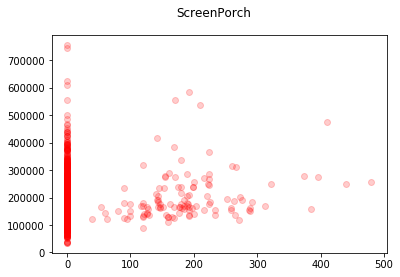

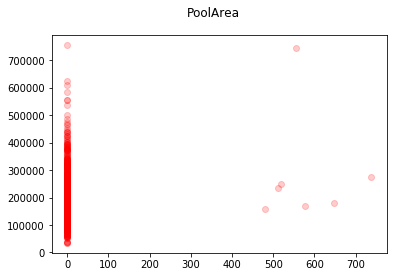

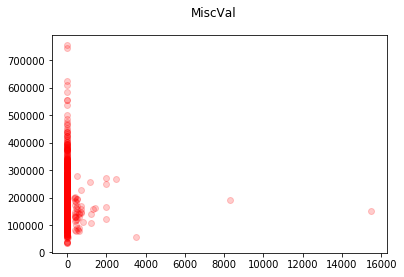

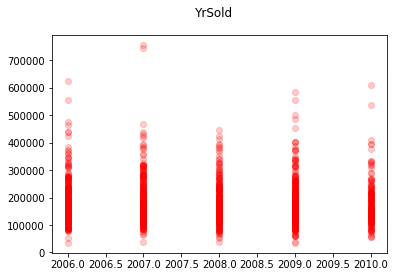

In [14]:
for col in cols:
    my_continuous_corr_plot(col, train_dataframe)

<Figure size 432x288 with 0 Axes>

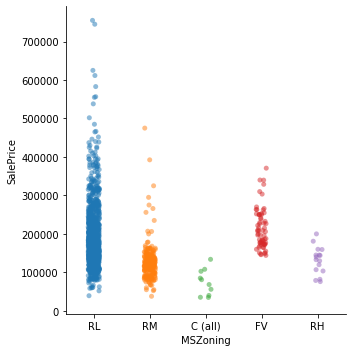

<Figure size 432x288 with 0 Axes>

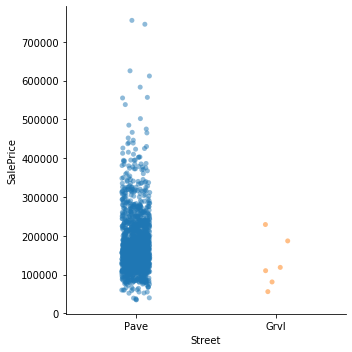

<Figure size 432x288 with 0 Axes>

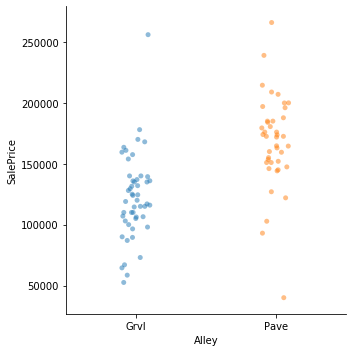

<Figure size 432x288 with 0 Axes>

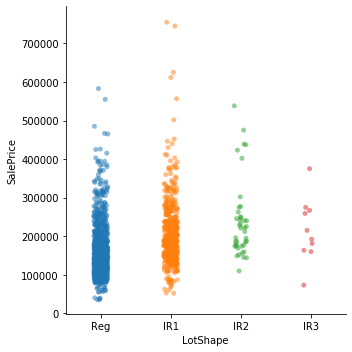

<Figure size 432x288 with 0 Axes>

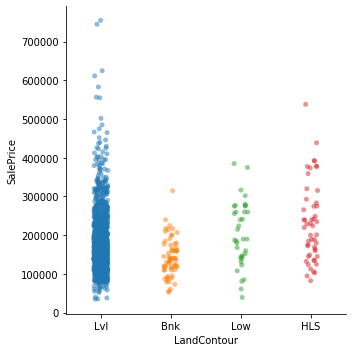

<Figure size 432x288 with 0 Axes>

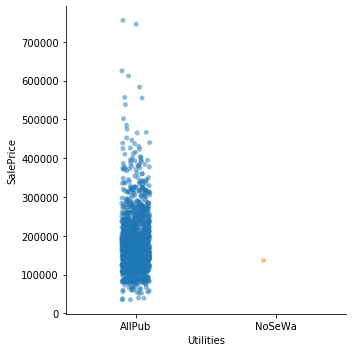

<Figure size 432x288 with 0 Axes>

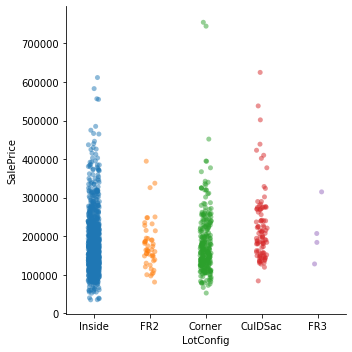

<Figure size 432x288 with 0 Axes>

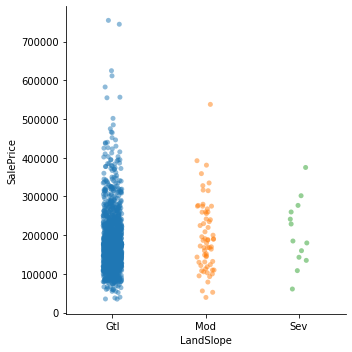

<Figure size 432x288 with 0 Axes>

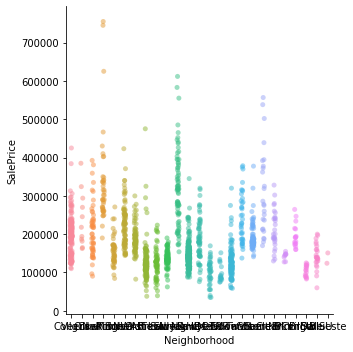

<Figure size 432x288 with 0 Axes>

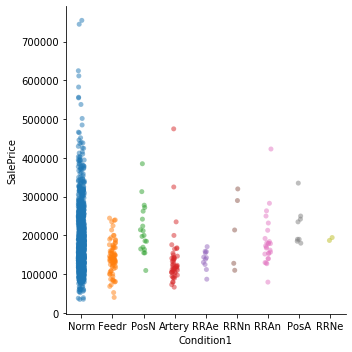

<Figure size 432x288 with 0 Axes>

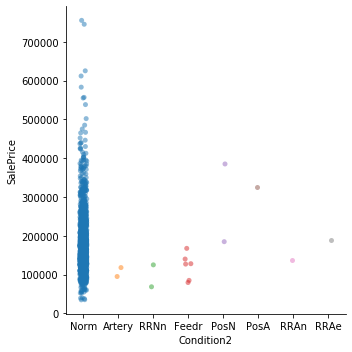

<Figure size 432x288 with 0 Axes>

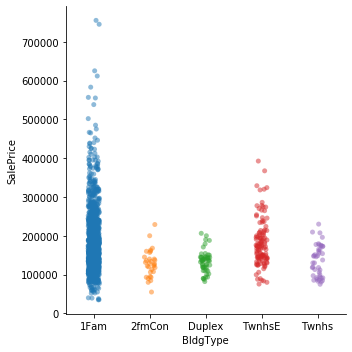

<Figure size 432x288 with 0 Axes>

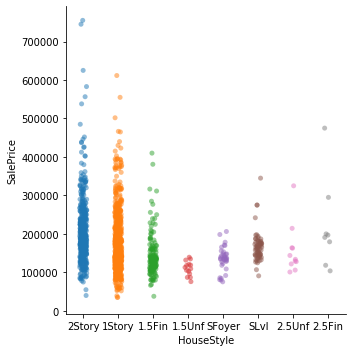

<Figure size 432x288 with 0 Axes>

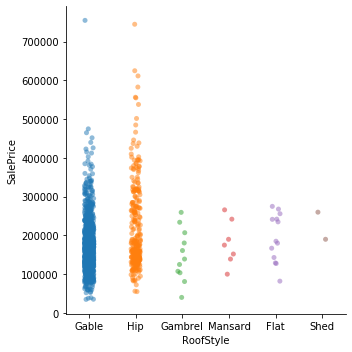

<Figure size 432x288 with 0 Axes>

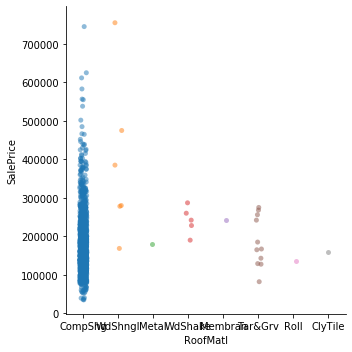

<Figure size 432x288 with 0 Axes>

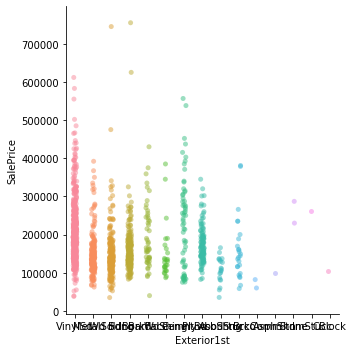

<Figure size 432x288 with 0 Axes>

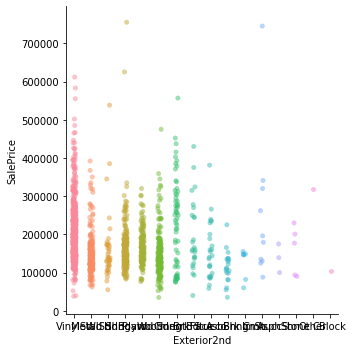

<Figure size 432x288 with 0 Axes>

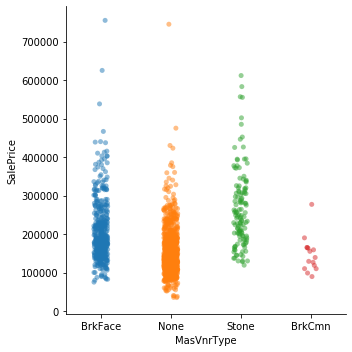

<Figure size 432x288 with 0 Axes>

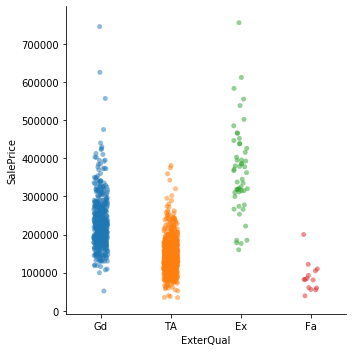

<Figure size 432x288 with 0 Axes>

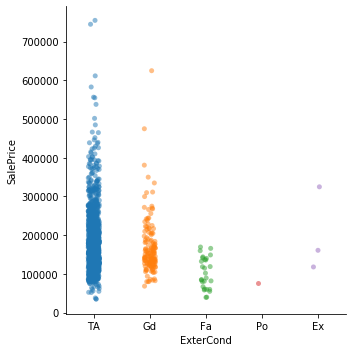

<Figure size 432x288 with 0 Axes>

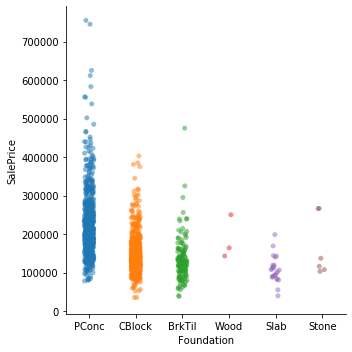

<Figure size 432x288 with 0 Axes>

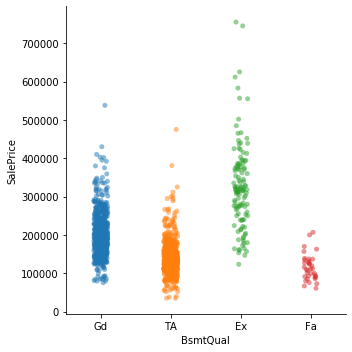

<Figure size 432x288 with 0 Axes>

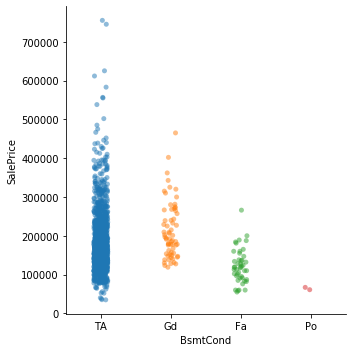

<Figure size 432x288 with 0 Axes>

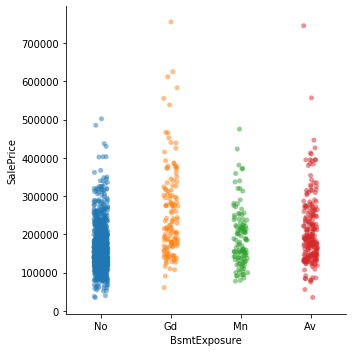

<Figure size 432x288 with 0 Axes>

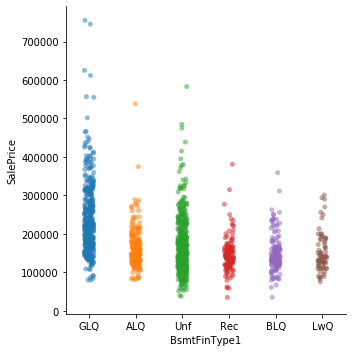

<Figure size 432x288 with 0 Axes>

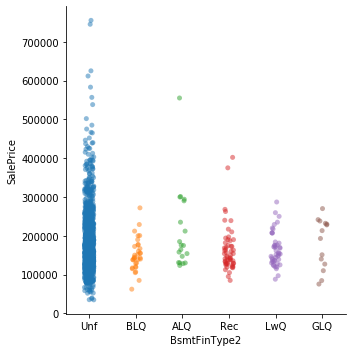

<Figure size 432x288 with 0 Axes>

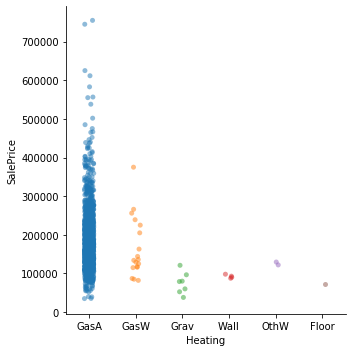

<Figure size 432x288 with 0 Axes>

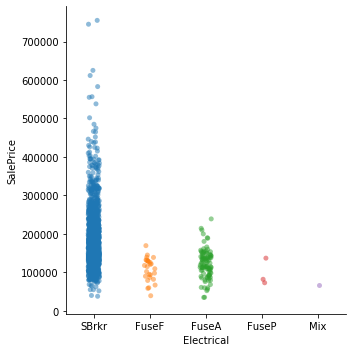

<Figure size 432x288 with 0 Axes>

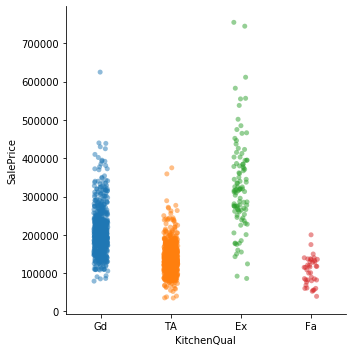

<Figure size 432x288 with 0 Axes>

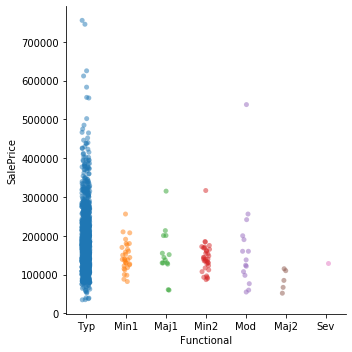

<Figure size 432x288 with 0 Axes>

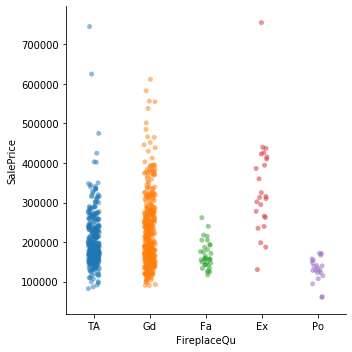

<Figure size 432x288 with 0 Axes>

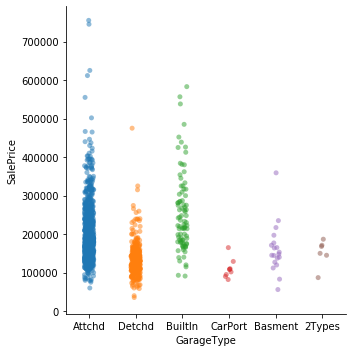

<Figure size 432x288 with 0 Axes>

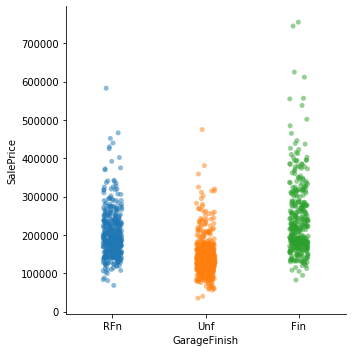

<Figure size 432x288 with 0 Axes>

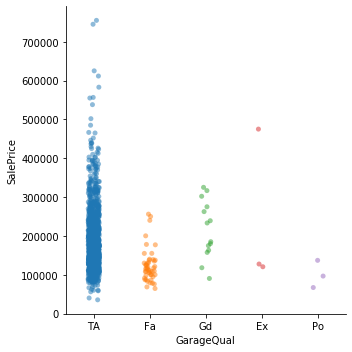

<Figure size 432x288 with 0 Axes>

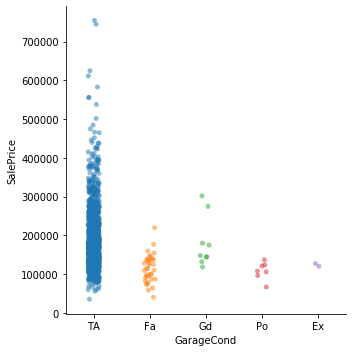

<Figure size 432x288 with 0 Axes>

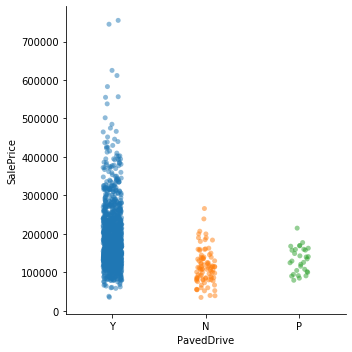

<Figure size 432x288 with 0 Axes>

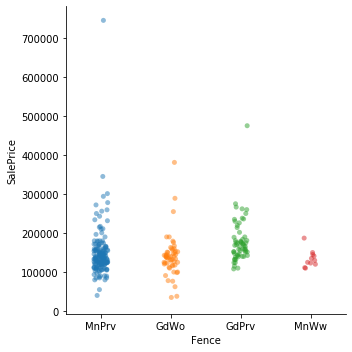

<Figure size 432x288 with 0 Axes>

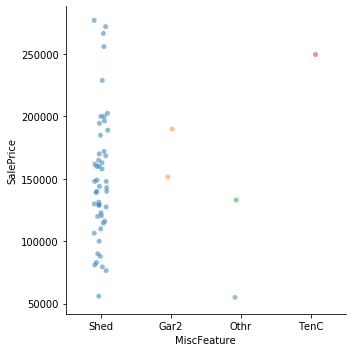

<Figure size 432x288 with 0 Axes>

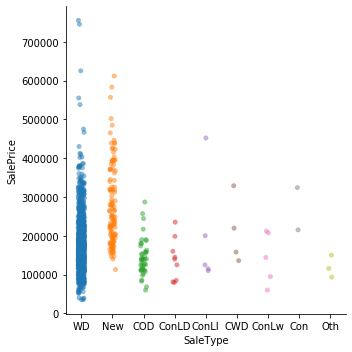

<Figure size 432x288 with 0 Axes>

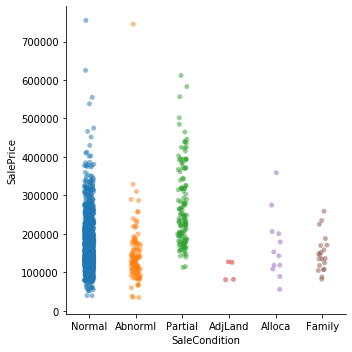

In [27]:
for col in cat_cols:
    try:
        my_cat_corr_plot(col, train_dataframe)
        plt.show()
    except:
        pass

<Figure size 432x288 with 0 Axes>

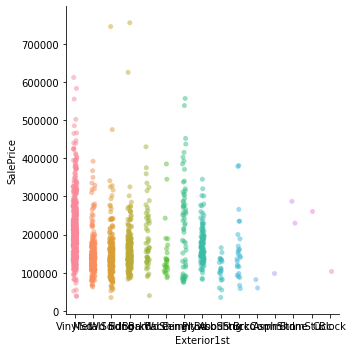

In [40]:
my_cat_corr_plot('Exterior1st', train_dataframe)

In [41]:
train_dataframe['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [17]:
pearson_list(cols, train_dataframe)

[['OverallQual', 0.79, 0.0],
 ['GrLivArea', 0.71, 0.0],
 ['GarageCars', 0.64, 0.0],
 ['GarageArea', 0.62, 0.0],
 ['TotalBsmtSF', 0.61, 0.0],
 ['FirstFlrSF', 0.61, 0.0],
 ['FullBath', 0.56, 0.0],
 ['TotRmsAbvGrd', 0.53, 0.0],
 ['YearBuilt', 0.52, 0.0],
 ['YearRemodAdd', 0.51, 0.0],
 ['GarageYrBlt', 0.49, 0.0],
 ['MasVnrArea', 0.48, 0.0],
 ['Fireplaces', 0.47, 0.0],
 ['BsmtFinSF1', 0.39, 0.0],
 ['LotFrontage', 0.34, 0.0],
 ['SecondFlrSF', 0.32, 0.0],
 ['WoodDeckSF', 0.32, 0.0],
 ['OpenPorchSF', 0.32, 0.0],
 ['HalfBath', 0.28, 0.0],
 ['LotArea', 0.26, 0.0],
 ['BsmtFullBath', 0.23, 0.0],
 ['BsmtUnfSF', 0.21, 0.0],
 ['BedroomAbvGr', 0.17, 0.0],
 ['KitchenAbvGr', -0.14, 0.0],
 ['EnclosedPorch', -0.13, 0.0],
 ['ScreenPorch', 0.11, 0.0],
 ['PoolArea', 0.09, 0.0],
 ['OverallCond', -0.08, 0.0],
 ['ThreeSsnPorch', 0.04, 0.09],
 ['LowQualFinSF', -0.03, 0.33],
 ['YrSold', -0.03, 0.27],
 ['BsmtHalfBath', -0.02, 0.52],
 ['MiscVal', -0.02, 0.42],
 ['BsmtFinSF2', -0.01, 0.66]]

In [18]:
spearman_list(cols, train_dataframe)

[['OverallQual', 0.81, 0.0],
 ['GrLivArea', 0.73, 0.0],
 ['GarageCars', 0.69, 0.0],
 ['YearBuilt', 0.65, 0.0],
 ['GarageArea', 0.65, 0.0],
 ['FullBath', 0.64, 0.0],
 ['TotalBsmtSF', 0.6, 0.0],
 ['GarageYrBlt', 0.59, 0.0],
 ['FirstFlrSF', 0.58, 0.0],
 ['YearRemodAdd', 0.57, 0.0],
 ['TotRmsAbvGrd', 0.53, 0.0],
 ['Fireplaces', 0.52, 0.0],
 ['OpenPorchSF', 0.48, 0.0],
 ['LotArea', 0.46, 0.0],
 ['MasVnrArea', 0.42, 0.0],
 ['LotFrontage', 0.39, 0.0],
 ['WoodDeckSF', 0.35, 0.0],
 ['HalfBath', 0.34, 0.0],
 ['BsmtFinSF1', 0.3, 0.0],
 ['SecondFlrSF', 0.29, 0.0],
 ['BsmtFullBath', 0.23, 0.0],
 ['BedroomAbvGr', 0.23, 0.0],
 ['EnclosedPorch', -0.22, 0.0],
 ['BsmtUnfSF', 0.19, 0.0],
 ['KitchenAbvGr', -0.16, 0.0],
 ['OverallCond', -0.13, 0.0],
 ['ScreenPorch', 0.1, 0.0],
 ['LowQualFinSF', -0.07, 0.01],
 ['ThreeSsnPorch', 0.07, 0.01],
 ['PoolArea', 0.06, 0.03],
 ['MiscVal', -0.06, 0.02],
 ['BsmtFinSF2', -0.04, 0.14],
 ['YrSold', -0.03, 0.25],
 ['BsmtHalfBath', -0.01, 0.64]]

### Histogram and Cumulative Density Functions

In [19]:
def my_histogram(col_name, input_df):
    plt.suptitle("{}".format(col_name))
    xval = input_df[col_name].values
    nas = np.isnan(xval)
    sns.distplot(xval[~nas], hist=True, kde=True, bins=int(180/10), color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    plt.show()

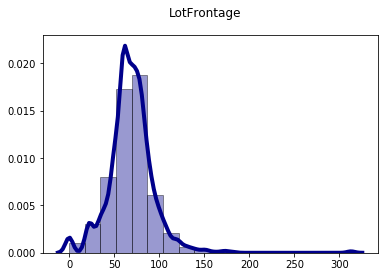

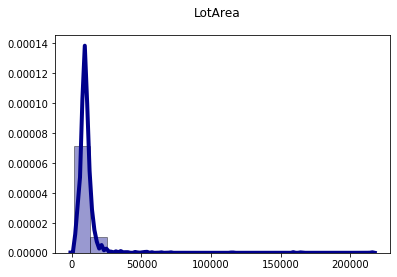

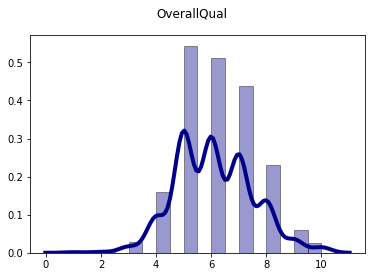

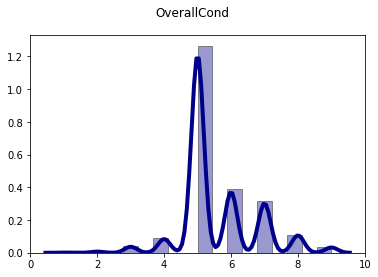

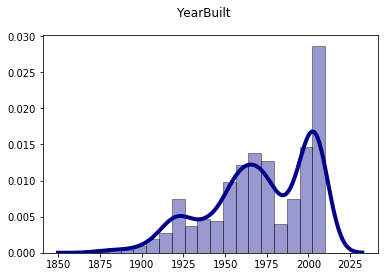

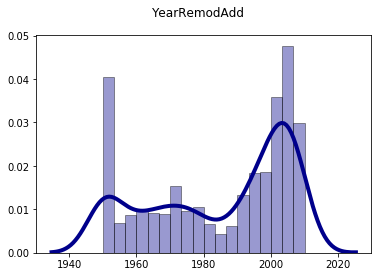

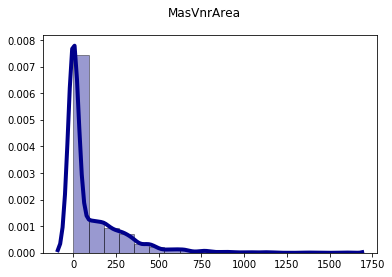

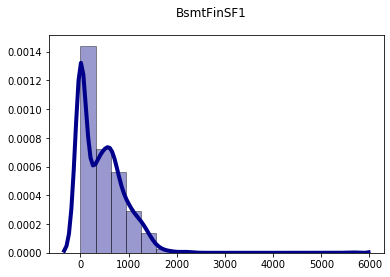

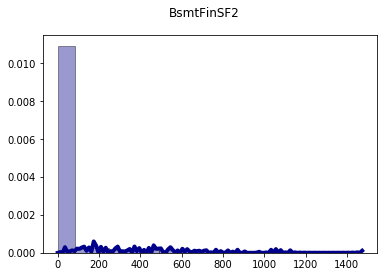

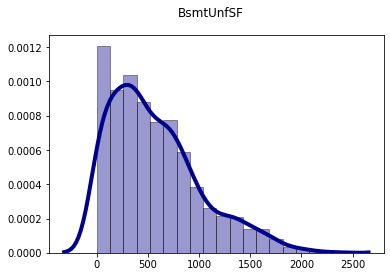

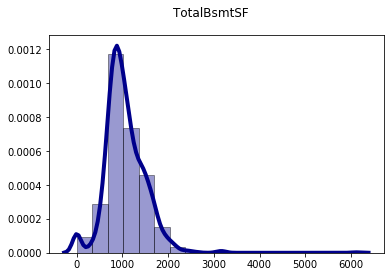

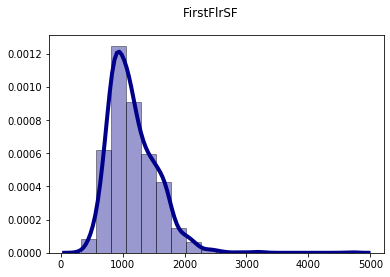

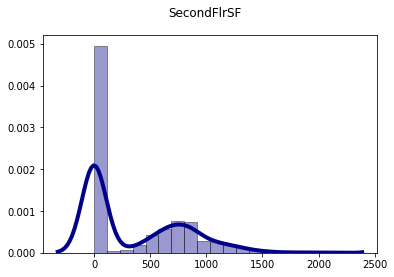

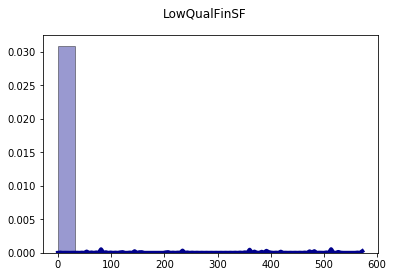

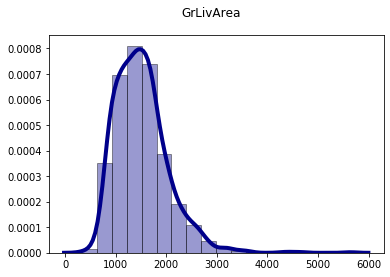

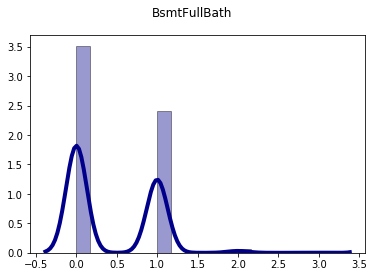

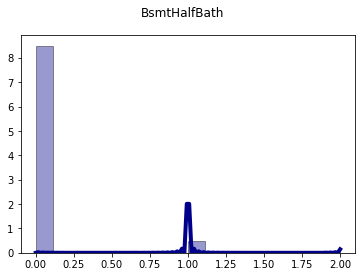

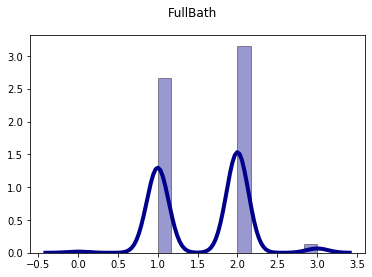

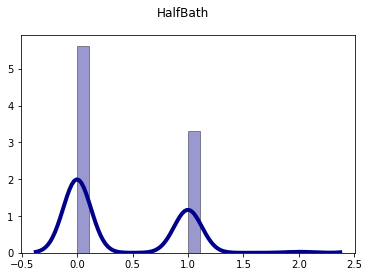

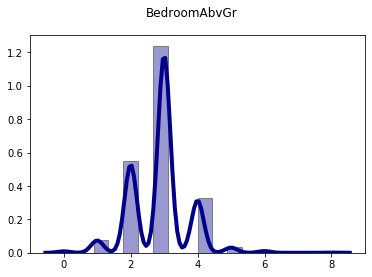

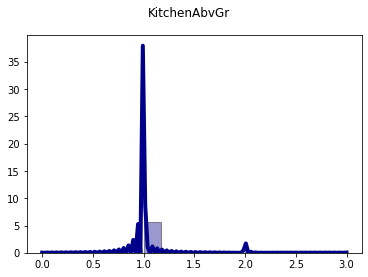

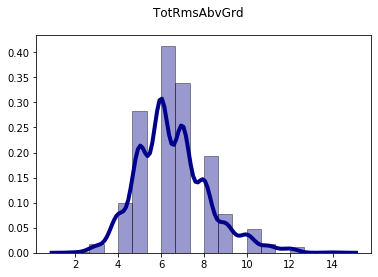

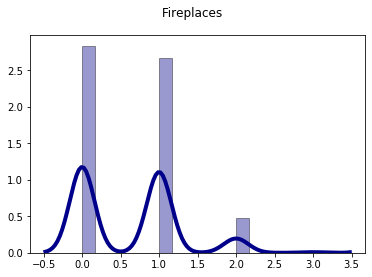

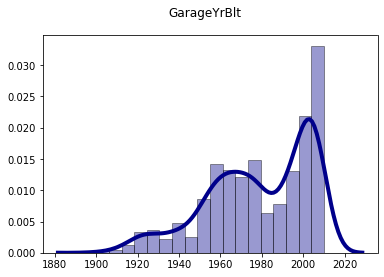

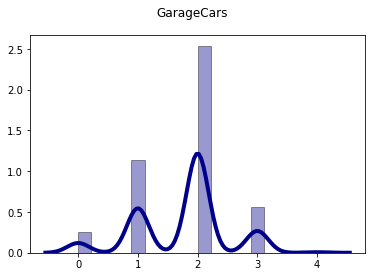

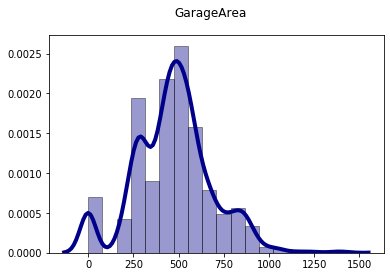

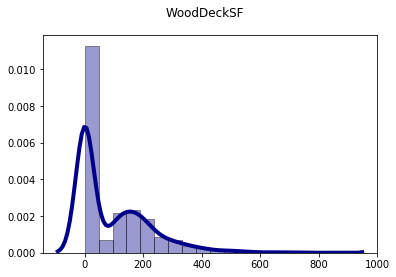

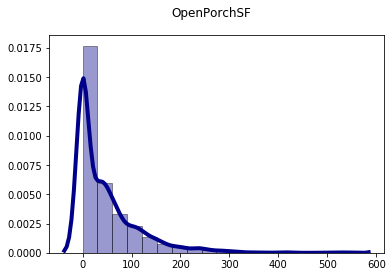

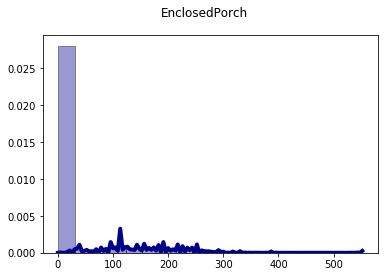

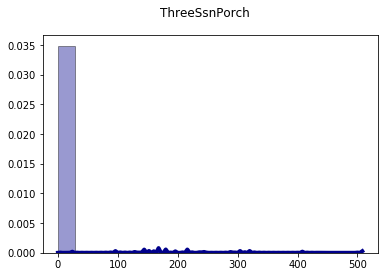

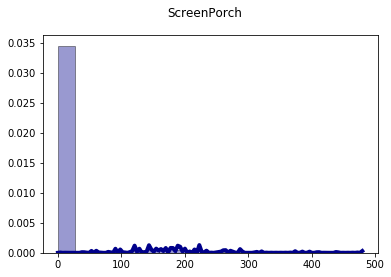

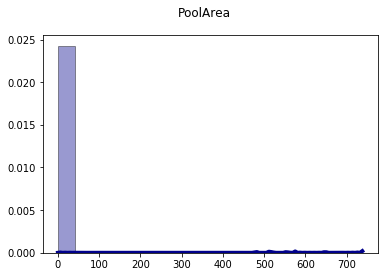

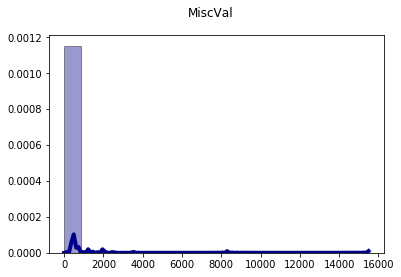

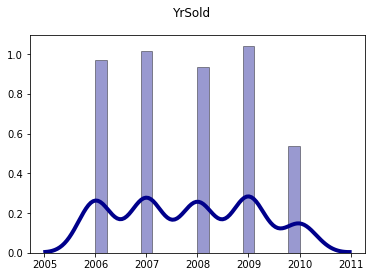

In [20]:
for col in cols:
    my_histogram(col, train_dataframe)